In [1]:
from UCBLearner1 import *
from GenerateEnvironment import *

In [15]:
env1, model, class_probability = generate_environment()
real_conv_rates = model["real_conversion_rates"]
prices = model["prices"]

T = 100 - 4
n_exp = 10
daily_user = 500

In [16]:
optimal_arm = optimization_algorithm(model, False)  # pull the optimal arm
print("Optimal_arm: ", optimal_arm)

optimal_act_rate = MC_simulation(model, real_conv_rates[range(5), optimal_arm], 5, 10000)

optimal_reward = return_reward(model, prices[range(5), optimal_arm],
                               real_conv_rates[range(5), optimal_arm], optimal_act_rate, model['real_alpha_ratio'], model['real_quantity'])
print("Optimal reward: ", optimal_reward)

Optimal_arm:  [1 0 1 0 0]
Optimal reward:  3.9431713537644453


In [17]:
learner = UCBLearner1(model)
instant_regret_rew = [[] for _ in range(n_exp)]
instant_regret_obs = [[] for _ in range(n_exp)]

In [18]:
for i in range(n_exp):
    print("Experiment number", i)
    for t in range(4):
        arm = [t, t, t, t, t]
        alpha_ratio = env1.alpha_ratio_otd()
        data = env1.round_single_day(daily_user, alpha_ratio, arm, class_probability)
        env_data = conv_data(data)
        learner.update(arm, env_data)

        act_rate = MC_simulation(model, real_conv_rates[range(5), arm], 5)
        rew = return_reward(model, prices[range(5), arm],
                            real_conv_rates[range(5), arm], act_rate, model['real_alpha_ratio'], model['real_quantity'])

        obs_reward = 0
        if len(data):
            for i_ in range(len(data)):
                obs_reward += np.sum(data[i_][0])

            obs_reward /= len(data)

        print("Pulled_arm: ", arm)

        instant_regret_rew[i].append(optimal_reward - rew)
        instant_regret_obs[i].append(optimal_reward - obs_reward)
        print("Time: ", t)

    for t in range(T):
        pulled_arm = learner.act()
        alpha_ratio = env1.alpha_ratio_otd()
        data = env1.round_single_day(daily_user, alpha_ratio, pulled_arm, class_probability)
        env_data = conv_data(data)
        learner.update(pulled_arm, env_data)

        act_rate = MC_simulation(model, real_conv_rates[range(5), pulled_arm], 5)
        rew = return_reward(model, prices[range(5), pulled_arm],
                            real_conv_rates[range(5), pulled_arm], act_rate, model['real_alpha_ratio'], model['real_quantity'])

        obs_reward = 0
        if len(data):
            for i_ in range(len(data)):
                obs_reward += np.sum(data[i_][0])

            obs_reward /= len(data)

        print("Pulled_arm: ", pulled_arm)

        instant_regret_rew[i].append(optimal_reward - rew)
        instant_regret_obs[i].append(optimal_reward - obs_reward)
        print("Time: ", t+4)
    learner.reset()

Experiment number 0
Pulled_arm:  [0, 0, 0, 0, 0]
Time:  0
Pulled_arm:  [1, 1, 1, 1, 1]
Time:  1
Pulled_arm:  [2, 2, 2, 2, 2]
Time:  2
Pulled_arm:  [3, 3, 3, 3, 3]
Time:  3
Pulled_arm:  [3 3 1 1 2]
Time:  4
Pulled_arm:  [2 3 1 1 1]
Time:  5
Pulled_arm:  [1 2 1 1 1]
Time:  6
Pulled_arm:  [1 1 1 1 1]
Time:  7
Pulled_arm:  [1 1 1 1 1]
Time:  8
Pulled_arm:  [1 1 1 1 1]
Time:  9
Pulled_arm:  [1 1 1 1 3]
Time:  10
Pulled_arm:  [1 1 1 1 2]
Time:  11
Pulled_arm:  [1 1 1 1 1]
Time:  12
Pulled_arm:  [1 2 1 1 1]
Time:  13
Pulled_arm:  [1 1 1 1 1]
Time:  14
Pulled_arm:  [1 1 1 1 1]
Time:  15
Pulled_arm:  [1 1 1 1 1]
Time:  16
Pulled_arm:  [1 1 1 0 0]
Time:  17
Pulled_arm:  [1 1 1 1 1]
Time:  18
Pulled_arm:  [1 1 1 1 0]
Time:  19
Pulled_arm:  [1 1 1 3 0]
Time:  20
Pulled_arm:  [1 1 1 1 1]
Time:  21
Pulled_arm:  [1 0 1 0 1]
Time:  22
Pulled_arm:  [1 1 1 1 1]
Time:  23
Pulled_arm:  [1 1 1 2 0]
Time:  24
Pulled_arm:  [1 1 1 0 1]
Time:  25
Pulled_arm:  [1 1 1 1 1]
Time:  26
Pulled_arm:  [1 1 1 0 0]
Time

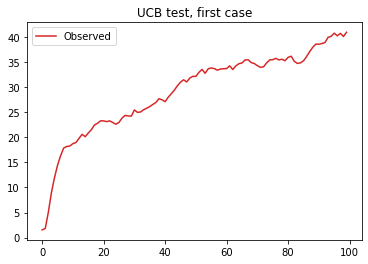

In [19]:
show_results(instant_regret_rew, instant_regret_obs, "UCB test, first case")

In [20]:
learner2 = UCBLearner1(model)
instant_regret_rew2 = [[] for _ in range(n_exp)]
instant_regret_obs2 = [[] for _ in range(n_exp)]

In [21]:
for i in range(n_exp):
    print("Experiment number", i)

    for t in range(T+4):
        pulled_arm = learner2.act()
        alpha_ratio = env1.alpha_ratio_otd()
        data = env1.round_single_day(daily_user, alpha_ratio, pulled_arm, class_probability)
        env_data = conv_data(data)
        learner2.update(pulled_arm, env_data)

        act_rate = MC_simulation(model, real_conv_rates[range(5), pulled_arm], 5)
        rew = return_reward(model, prices[range(5), pulled_arm],
                            real_conv_rates[range(5), pulled_arm], act_rate, model['real_alpha_ratio'], model['real_quantity'])

        obs_reward = 0
        if len(data):
            for i_ in range(len(data)):
                obs_reward += np.sum(data[i_][0])

            obs_reward /= len(data)

        print("Pulled_arm: ", pulled_arm)

        instant_regret_rew2[i].append(optimal_reward - rew)
        instant_regret_obs2[i].append(optimal_reward - obs_reward)
        print("Time: ", t)
    learner2.reset()

Experiment number 0
Pulled_arm:  [3 2 3 1 0]
Time:  0
Pulled_arm:  [2 1 3 3 3]
Time:  1
Pulled_arm:  [2 1 2 2 3]
Time:  2
Pulled_arm:  [3 1 1 2 1]
Time:  3
Pulled_arm:  [2 1 2 3 2]
Time:  4
Pulled_arm:  [1 1 1 2 1]
Time:  5
Pulled_arm:  [1 1 1 1 1]
Time:  6
Pulled_arm:  [2 1 2 1 1]
Time:  7
Pulled_arm:  [1 1 1 1 1]
Time:  8
Pulled_arm:  [1 3 1 3 1]
Time:  9
Pulled_arm:  [1 2 1 1 1]
Time:  10
Pulled_arm:  [1 1 1 2 1]
Time:  11
Pulled_arm:  [2 1 1 1 0]
Time:  12
Pulled_arm:  [1 1 1 1 0]
Time:  13
Pulled_arm:  [1 2 1 1 1]
Time:  14
Pulled_arm:  [1 1 1 1 1]
Time:  15
Pulled_arm:  [1 1 1 1 0]
Time:  16
Pulled_arm:  [1 1 1 1 1]
Time:  17
Pulled_arm:  [1 1 1 1 3]
Time:  18
Pulled_arm:  [1 1 1 0 1]
Time:  19
Pulled_arm:  [1 1 1 0 1]
Time:  20
Pulled_arm:  [1 1 1 0 0]
Time:  21
Pulled_arm:  [1 1 1 3 3]
Time:  22
Pulled_arm:  [1 1 1 1 0]
Time:  23
Pulled_arm:  [1 1 1 1 2]
Time:  24
Pulled_arm:  [1 1 1 0 1]
Time:  25
Pulled_arm:  [1 1 1 2 0]
Time:  26
Pulled_arm:  [1 1 1 0 0]
Time:  27
Pulled_arm

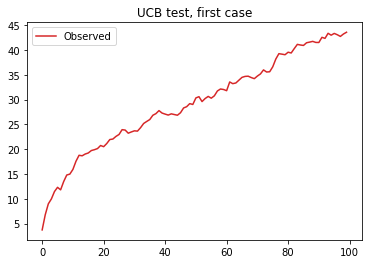

In [22]:
show_results(instant_regret_rew2, instant_regret_obs2, "UCB test, first case")